# Python Group
## Wali Chaudhary, Bryce Shurts, & Alex Wright

## 1. Business Understanding

The Hotels Reservation dataset was uploaded by Ahsan Raza on kaggle in an effort to discover patterns in online-booking tendencies of hotel customers. Specifically, if a customer would honor the reservation or if they would eventually cancel it. The data was collected from a single country which cannot be disclosed for privacy reasons as stated by Ahsan in the Kaggle discussion posts.

The datasets description states there have been major issues in the hotel industry in regard to consumer online booking activity. The convenience and low to little cost of cancelling an online-booking has led to a significant change in consumer behavior. There are a larger number of cancellations and rescheduling due to changes of plans, scheduling conflicts, and other unforeseen circumstances. Ahsan describes this convenient cancellation feature as beneficial to hotel guests, but less desirable and possible revenue diminishing for hotels.

One can use this dataset to predict if a consumer will honor their reservation or not. Parties that may be interested in the classification result may be those employed in Hotel Management, or management from any industry that deals with an online reservation system such as restaurants, resorts, or motels. A hotel manager will be able to gain insight as to why certain customers may be more prone to online cancelling and may make better estimations regarding hotel occupancy.

### 1.1 Measure of Success

So, what defines a successful machine learning algorithm?
Due to the non-critical nature of hotel cancellations, it is safe to assume that a good model should be able to predict more accurately than random occurrence (50/50). For a business with a more aggressive strategy to produce profit, baseline of 80% for the classification rate may be ideal.


## 2. Data Understanding

The dataset contains 19 features, 14 numerical (continuous/discrete) and 5 categorical (nominal/ordinal), which can be broken down as such:

- Booking_ID: Qualitative, discrete, & nominal feature; one-hot encoded integer repersentation
- no_of_adults: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_children: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_weekend_nights: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_week_nights: Quantitative, continuous, & ratio feature; integer repersentation
- type_of_meal_plan: Qualitative, discrete, & ordinal feature; integer repersentation
- required_car_parking_space: Qualitative, discrete, & nominal feature; binary repersentation
- room_type_reserved: Qualitative, discrete, & ordinal feature; integer repersentation
- lead_time: Quantitative, continuous, & ratio feature; integer repersentation
- arrival_year: Qualitative, discrete, & ordinal feature; integer repersentation
- arrival_month: Qualitative, discrete, & ordinal feature; integer repersentation
- arrival_date: Qualitative, discrete, & ordinal feature; integer repersentation
**Could be argued as nominal depending on how we apply it**
- market_segment_type: Qualitative, discrete, & nominal feature; one-hot encoded integer repersentation
**Maybe it could be argued as ordinal? Not sure if there's really a clear hierarchy in the data**
- repeated_guest: Qualitative, discrete, & nominal feature; binary repersentation
- no_of_previous_cancellations: Quantitative, continuous, & ratio feature; integer repersentation
- no_of_previous_bookings_not_canceled: Quantitative, continuous, & ratio feature; integer repersentation
- avg_price_per_room: Quantitative, continuous, & ratio feature; float repersentation
- no_of_special_requests: Quantitative, continuous, & ratio feature; integer repersentation
- booking_status: Qualitative, discrete, & nominal feature; binary repersentation

<sub> Plain english feature definitions can be sourced from the original's dataset listing at https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset in the Details section </sub>

In [84]:
import pandas as pd
import numpy as np

# Typings
from pandas import ( DataFrame, Series )
from numpy import ndarray

df: DataFrame = pd.read_csv("Hotel Reservations.csv")

### 2.1 Data Description

In [85]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [86]:
# Define data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Get some statistics about the data set

In [87]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### 2.2 Data Quality

After analyzing the data in the following graphs, we find that there is no missing data and that nothing will need to be imputed into our dataset.

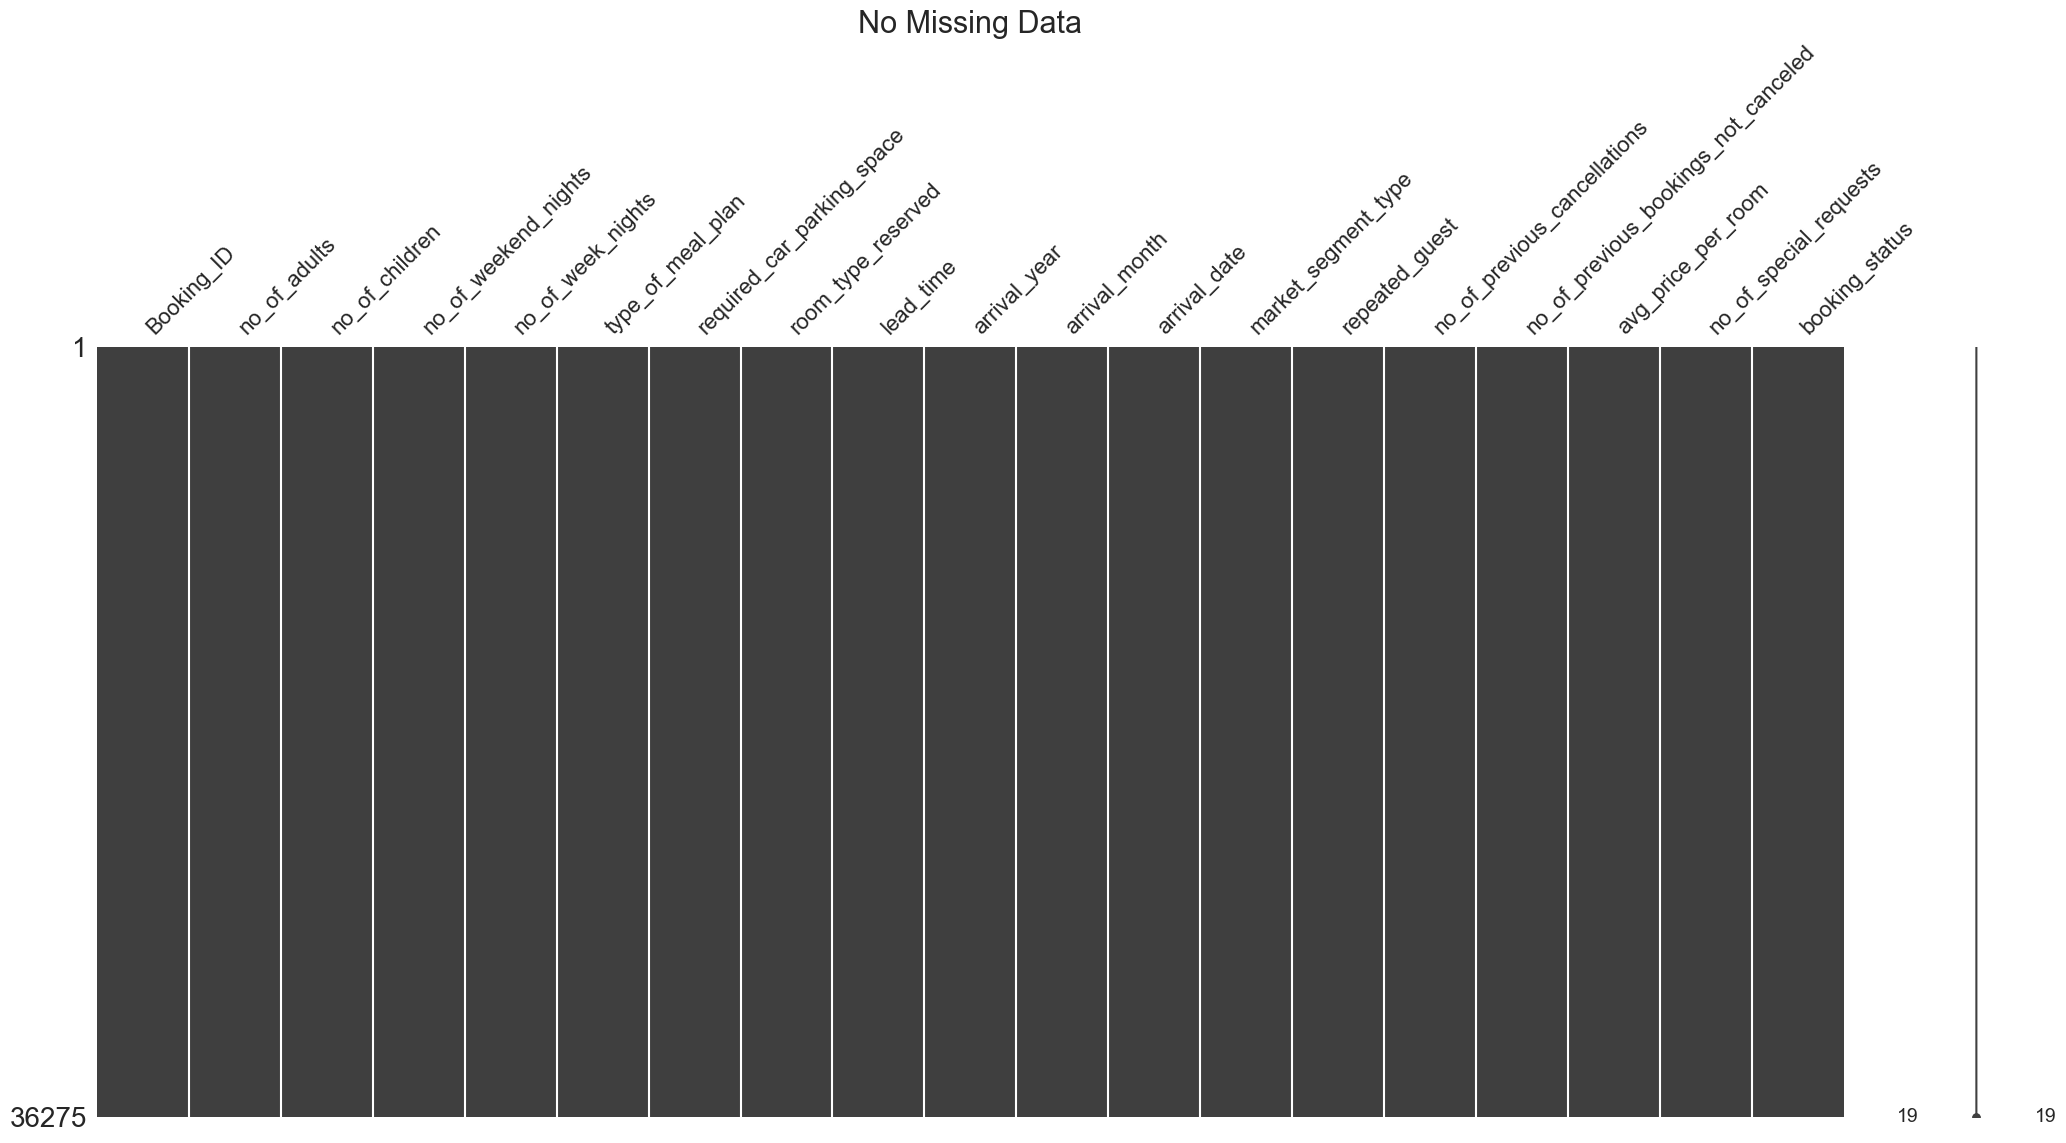

In [88]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
import pandas as pd

warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
import missingno as mn

df = pd.read_csv("Hotel Reservations.csv")
mn.matrix(df)
plt.title("No Missing Data", fontsize=22)
plt.show()


In [89]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### Duplicate entries
The dataset labels each entry with a unique ID that is associated with a booking entry by INNHotels, the hotel chain the data was sourced from. As such, we can be confident that the dataset does not contain any duplicate entries, vis-à-vis multiple entries repersenting the same booking. 

#### Other invalid data
While duplicates may not be a chief concern, there is still the need to consider whether or not the data present in the dataset is entirely valid. For this purpose, we can do some basic sanity checking of the data:

In [90]:
# List all arrival years; any before 1986 or after 2022 would be invalid:
print(df["arrival_year"].lt(1986).any())
print(df["arrival_year"].gt(2022).any())

# Check for any dates that are invalid for the month:
# In place to avoid needing to make too many new dataframes
df.rename(columns= {"arrival_year": "year", "arrival_month": "month", "arrival_date": "day"}, inplace=True)

# TODO: avoid making temporary list
temp = pd.to_datetime(df[["year", "month", "day"]], errors = "coerce")
print(temp.isnull().any()) # True means there are invalid dates somewhere
df.drop(axis=1, index=temp[temp.isnull()].index, inplace=True)

False
False
True


#### Formatting data for machine learning

Because the Booking_ID column is different for every single row, it is likely to not have statistical significance as there are no relationships to it besides only from the row it's associated with. We can go ahead and drop it.

In [91]:
df.drop('Booking_ID', axis=1, inplace=True)

In [92]:
# Encode class labels

# Find the unique class label values (should be 'Canceled' and
# 'Not Canceled'), and transform the dataframe to include those
bk_status_mapping = {
    label: idx for idx, label in enumerate(np.unique(df.booking_status))
}
df.booking_status: Series = df.booking_status.map(bk_status_mapping)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,year,month,day,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0


Now lets one-hot encode any ordinal categorical features such as
type_of_meal_plan, room_type_reserved, arrival_year, market_segment_type.

During the one-hot encoding, we will also drop the first column of each produced set of columns after the one-hot encoding; this is to prevent a degree of multi-collinearity as the dropped column's value can be inferred from the absence any selected values in the other columns

In [93]:
df = pd.concat([df, pd.get_dummies(df[['type_of_meal_plan', 'room_type_reserved', 'year', 'market_segment_type']], drop_first=True)], axis=1)

# Wali - For some reason there is no second column produced when getting the dummies for the year. Leaving out the year  when dropping columns
df.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], axis=1, inplace=True)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,year,month,day,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


In [94]:
print(df.dtypes)
print('========')
print(df.info())

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
year                                      int64
month                                     int64
day                                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
year                                      int64
type_of_meal_plan_Meal Plan 2             uint8
type_of_meal_plan_Meal Plan 3             uint8
type_of_meal_plan_Not Selected            uint8
room_type_reserved_Room_Type 2            uint8
room_type_reserved_Room_Type 3          

## 3. Data visualization

#### Correlation between different columns

In [95]:
import seaborn as sns
# Use Pearson correlation since data is discrete (req. for Pearson)
discrete_corr = df[["type_of_meal_plan_Meal Plan 1", "type_of_meal_plan_Meal Plan 2", "type_of_meal_plan_Meal Plan 3", "type_of_meal_plan_Not Selected", "required_car_parking_space", "repeated_guest", "year", "month", "day","market_segment_type_Online", "market_segment_type_Offline", "market_segment_type_Corporate", "market_segment_type_Complementary", "market_segment_type_Aviation"]]
discrete_corr = discrete_corr.corrwith(df["booking_status"], method="pearson", numeric_only=True)
plt.figure(figsize=(4,7))
sns.heatmap(discrete_corr.to_frame("Correlation with booking status"), annot=True, cmap='PiYG')

KeyError: "['type_of_meal_plan_Meal Plan 1', 'market_segment_type_Aviation'] not in index"

In [ ]:
import seaborn as sns
# Use Kendall's correlation since some data is ordinal & not continuous (req. for Pearson)
continuous_corr = df[["no_of_adults", "no_of_children", "no_of_weekend_nights", "no_of_week_nights", "lead_time", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled", "avg_price_per_room", "no_of_special_requests"]]
continuous_corr = continuous_corr.corrwith(df["booking_status"], method="kendall", numeric_only=True)
plt.figure(figsize=(4,7))
sns.heatmap(continuous_corr.to_frame("Correlation with booking status"), annot=True, cmap='PiYG')

#### Principal Component Analysis

Before actually launching into the PCA work, we first want to examine the dataset as a whole. By doing so, we hope to gain insight into the distribution of data across our features, which may inform our later normalization. If the data is siginifcantly skewed, for instance, we may want to perform log scaling or sample clipping on certain features prior to computing a z-score normalization.

In [ ]:
_ = df.hist(figsize=(25,25))

TODO (Bryce): Add some analysis once our other methods for dimension reduction are implemented

In [ ]:
from scipy.stats import zscore
# Remove booking_status since it's going to heavily correlate to the target feature (itself...)
df_temp = df.drop("booking_status", axis=1)
#TODO (Bryce): Potentially add some extra scaling/normalization features.
df_normalized = df_temp.apply(zscore)

Now that we have our data normalized, we need to identify the number of components we should be reducing our data to, so that we have as few dimensions as possible to handle while still being able to explain as much of our data's variance as possible. To do this, we will generate several normal PCAs and compare the resulting eigenvalues against the Kaiser rule to determine the ideal set of components for later analysis and clustering.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=df_normalized.shape[1])
pca.fit(df_normalized)

color_var = "#008000"
color_eig = "#0000FF"
fig, ax_var = plt.subplots(figsize=(9,6))
ax_eig = ax_var.twinx()
ax_var.set_xlabel("Component")
ax_var.set_title("Component Analysis")
ax_var.set_ylim(0, 20)
ax_eig.set_ylim(0, 4)

ax_var.plot(pca.explained_variance_ratio_ * 100, marker="x", color=color_var)
ax_var.set_ylabel('Percentage of Explained Variance', color=color_var)
ax_var.tick_params(axis="y", labelcolor=color_var)

ax_eig.plot(pca.explained_variance_, marker="o", color=color_eig)
ax_eig.set_ylabel("Eigenvalue (λ) size", color=color_eig)
ax_eig.tick_params(axis="y", labelcolor=color_eig)
ax_eig.axhline(y=1, linestyle=":", label="Kaiser rule", color=color_eig)

intersection = np.argwhere(np.diff(np.sign(1 - pca.explained_variance_))).flatten()
if len(intersection) == 0:
    num_components = len(final_pca.explained_variance_)
else:
    num_components = intersection[0] - 1
    ax_eig.axvline(x=num_components, linestyle="dashed", label="Component %d" %(num_components + 1), color="red")
sum = 0
for index in range(num_components):
    sum = sum + (pca.explained_variance_ratio_[index] * 100).round(1)
    ax_var.text(index, pca.explained_variance_ratio_[index] * 100, (pca.explained_variance_ratio_[index] * 100).round(1), size=12)
    ax_eig.text(index, pca.explained_variance_[index], pca.explained_variance_[index].round(1), size=12)
    
ax_eig.legend(loc="upper right")
plt.show()
print("Amount of variance explained by all components s.t. λ_component > 1: " + str(sum) + "%")

Now that we can see our ideal number of components, we need to re-apply the PCA using N components and the X method (Linear, Kernel (polynominal, RBF, sigmoid, etc.), Sparse, Incremental, etc.) using a more thorough single-value decomposition method (lapack instead of randomized)

Author's note: probably going to be a linear unless we end up finding that more complex transformations would be useful

In [ ]:
final_pca = PCA(n_components=num_components, svd_solver="full")
final_pca.fit(df_normalized)

color_var = "#008000"
color_eig = "#0000FF"
fig, ax_var = plt.subplots(figsize=(9,6))
ax_eig = ax_var.twinx()
ax_var.set_xlabel("Component")
ax_var.set_title("Final Component Analysis")
ax_var.set_ylim(0, 20)
ax_eig.set_ylim(0, 4)

ax_var.plot(final_pca.explained_variance_ratio_ * 100, marker="x", color=color_var)
ax_var.set_ylabel('Percentage of Explained Variance', color=color_var)
ax_var.tick_params(axis="y", labelcolor=color_var)

ax_eig.plot(final_pca.explained_variance_, marker="o", color=color_eig)
ax_eig.set_ylabel("Eigenvalue (λ) size", color=color_eig)
ax_eig.tick_params(axis="y", labelcolor=color_eig)
ax_eig.axhline(y=1, linestyle=":", label="Kaiser rule", color=color_eig)

# All of the Kaiser rule and intersection stuff is just a sanity check at this point
intersection = np.argwhere(np.diff(np.sign(1 - final_pca.explained_variance_))).flatten()
if len(intersection) == 0:
    num_components = len(final_pca.explained_variance_)
else:
    num_components = intersection[0] - 1
    ax_eig.axvline(x=num_components, linestyle="dashed", label="Component %d" %(num_components + 1), color="red")
sum = 0
for index in range(num_components):
    sum = sum + (final_pca.explained_variance_ratio_[index] * 100).round(1)
    ax_var.text(index, final_pca.explained_variance_ratio_[index] * 100, (final_pca.explained_variance_ratio_[index] * 100).round(1), size=12)
    ax_eig.text(index, final_pca.explained_variance_[index], final_pca.explained_variance_[index].round(1), size=12)
    
ax_eig.legend(loc="upper right")
plt.show()
print("Amount of variance explained by all components: " + str(sum) + "%")

#### Clustering (TODO)

Probably going to use WCSS & the elbow method, but implementing DBSCAN might be worth examining as well (they both automatically determine the number of clusters/groups/communities in a dataset)

In [ ]:
df['market_segment_type'].value_counts()

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax=sns.countplot(data=df, x='market_segment_type', hue='booking_status', palette='rainbow')
plt.title('market segment type vs booking status')
plt.xlabel('market segment')
plt.ylabel('count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+500))

In [ ]:
plt.figure(figsize=(10,8))
x=sns.kdeplot(data=df,y='avg_price_per_room',hue='booking_status',fill=True,gridsize=1000)
x.set_yticks(range(0,600,50))
plt.show()

### 3.1 Data Exploration

We see that Online reservations have a high cancellation rate, while corporate and complementary reservations see low cancellation rates

In [ ]:
# on the basis of arrival_month 
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax=sns.countplot(data=df,x='arrival_month',hue='booking_status',palette='viridis')
plt.title('arrival_month vs booking status')
plt.xlabel('market segment')
plt.ylabel('count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+50))

In [ ]:
plt.hist2d(x=df.lead_time, y=df.avg_price_per_room, bins=30)
plt.colorbar()
plt.xlabel("Lead Time")
plt.ylabel("Room Price")
plt.show()

In [ ]:
import numpy as np

# plot the correlation matrix 
vars_to_use = ['lead_time', 'avg_price_per_room', 'no_of_week_nights', 'no_of_weekend_nights'] # pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

In [ ]:
sns.violinplot(x="lead_time", y="avg_price_per_room", hue="no_of_week_nights", data=df, 
               split=True, # split across violins
               inner="quart", # show innner stats like mena, IQR, 
               scale="count") # scale the size of the plot by the count within each group

plt.show()

Some graphs from:
https://www.kaggle.com/code/effortno11/beginner-friendly-eda-model-comparison#Data-Analysis

# Uniform Manifold Approximation

In [ ]:
import umap
import umap.plot
import pandas as pd
from sklearn.utils import Bunch
import warnings
warnings.filterwarnings('ignore')

import numpy as np

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=class_color)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=class_color)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2],  c=class_color, s=100)
    plt.title(title, fontsize=18)

df = pd.read_csv("Hotel Reservations.csv")
df.head()

# drop booking id
df.drop('Booking_ID', axis=1, inplace=True)

# define maps for string variables
map1 = {'Not Selected':0, 'Meal Plan 1':1, 'Meal Plan 2':2}
map2 = {'Room_Type 1':1, 'Room_Type 2':2, 'Room_Type 3':3, 'Room_Type 4':4, 'Room_Type 5':5, 'Room_Type 6':6 }
map3 = {'Offline':0, 'Online':1, 'Corporate':2, 'Aviation':3, 'Complementary':4}
map4 = {'Not_Canceled':0, 'Canceled':1}

# convert strings to integers
df.type_of_meal_plan = df.type_of_meal_plan.map(map1)
df.room_type_reserved = df.room_type_reserved.map(map2)
df.market_segment_type = df.market_segment_type.map(map3)
df.booking_status = df.booking_status.map(map4)

# drop any NaN's (should be none, but just in case)
df = df.dropna()
df.head()

# get columns for scaling
df_data = df[
    [

        "required_car_parking_space", "room_type_reserved", "lead_time", 
         "market_segment_type","repeated_guest", "no_of_previous_cancellations",
        "no_of_previous_bookings_not_canceled", "no_of_special_requests", "booking_status",
        
    ]
].values

# shift mean to center and scale by std deviation
scaled_df_data = StandardScaler().fit_transform(df_data)

# init UMAP
reducer = umap.UMAP(
n_neighbors=15, min_dist=0.1, n_components=3, metric='euclidean'
)

# fit data
embedding = reducer.fit_transform(scaled_df_data)

# draw scatter plot (not too useful as this data doesn't seperate as nicely as things like measured lenghts of objects)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.booking_status])
plt.gca().set_aspect('equal', 'datalim')
plt.title('2D UMAP projection of the Hotel dataset', fontsize=24);

# draw umap for various neighbor sizes
data = scaled_df_data
# assign each booking status a color used for 3d plot
class_color = [sns.color_palette()[x] for x in df.booking_status]

# draw umap in 3 dimensions
draw_umap(n_components=3, title='3D UMAP projection of the Hotel dataset')


# References
# https://umap-learn.readthedocs.io/en/latest/basic_usage.html
# https://umap-learn.readthedocs.io/en/latest/parameters.html

# https://umap-learn.readthedocs.io/en/latest/plotting.html

# Also useful link
# https://scikit-learn.org/stable/tutorial/index.html


# UMAP Results
From the projections you can see clustering on the north side of the 3d projection as well as on the north side of the 2D projection showing clearing defined clustering of cancelled and honored reservations
